#Importing Libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

Importing Dataset

Countries with respect to Deaths ratio

In [ ]:
# Load the dataset
file_path = 'place path of your dataset here'
covid_data = pd.read_csv(file_path)
print(type(covid_data))

# Preprocessing: Convert 'Date' column to datetime
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

<class 'pandas.core.frame.DataFrame'>


1 - Top 10 Cuntries According to Death Ratio

In [ ]:
# Aggregate data by Country/Region
aggregated_data = covid_data.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# Calculate Death Ratio for each country
aggregated_data['Deaths_Ratio'] = (aggregated_data['Deaths'] / aggregated_data['Confirmed']) * 100

# Sort by Death Ratio in descending order and display top 10 countries
top_10_death_ratio = aggregated_data.sort_values(by='Deaths_Ratio', ascending=False).head(10)

# Display the top 10 countries with the highest death ratio
print(top_10_death_ratio[['Country/Region', 'Deaths', 'Confirmed','Recovered','Active','Deaths_Ratio']])


     Country/Region   Deaths  Confirmed  Recovered    Active  Deaths_Ratio
184           Yemen    17707      67180      23779     25694     26.357547
16          Belgium   963679    6281116    1627492   3689945     15.342481
177  United Kingdom  3997775   26748587     126217  22624595     14.945743
61           France  3048524   21210926    7182115  10980287     14.372423
85            Italy  3707717   26745145   15673910   7363518     13.863140
77          Hungary    51053     396247     204205    140989     12.884135
120     Netherlands   622314    5167516      16967   4528235     12.042807
111          Mexico  1728277   14946202   11141225   2076700     11.563319
157           Spain  3033030   27404045   15093583   9277432     11.067819
11          Bahamas     1203      12100       6047      4850      9.942149


Plotting-
Countries with respect to Deaths ratio
Top 10 Cuntries According to Death Ratio

C:\Users\wAHAB\AppData\Local\Temp\ipykernel_11936\3237361318.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  bars = plt.barh(top_10_death_ratio['Country/Region'], top_10_death_ratio['Deaths_Ratio'], color=plt.cm.get_cmap('tab10', 10).colors)


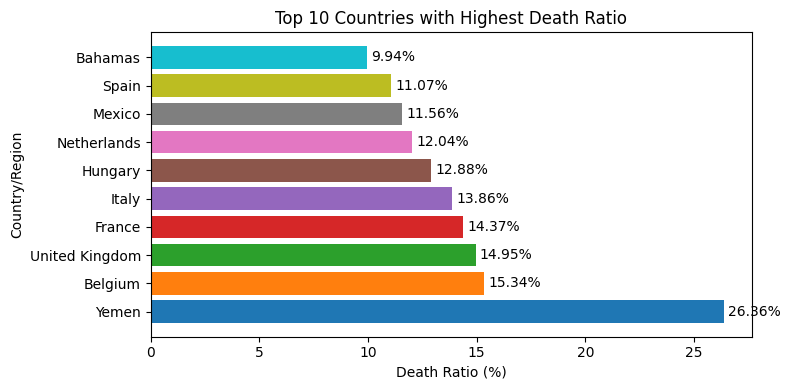

In [47]:
# Plotting the horizontal bar chart
plt.figure(figsize=(8, 4))
bars = plt.barh(top_10_death_ratio['Country/Region'], top_10_death_ratio['Deaths_Ratio'], color=plt.cm.get_cmap('tab10', 10).colors)

# Add labels and title
plt.xlabel('Death Ratio (%)')
plt.ylabel('Country/Region')
plt.title('Top 10 Countries with Highest Death Ratio')

# Add the Death Ratio values on each bar
for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', 
             va='center', ha='left', color='black', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\wAHAB\AppData\Local\Temp\ipykernel_11936\3926400262.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  autopct='%1.1f%%', startangle=140, colors=plt.cm.get_cmap('tab10', 10).colors)


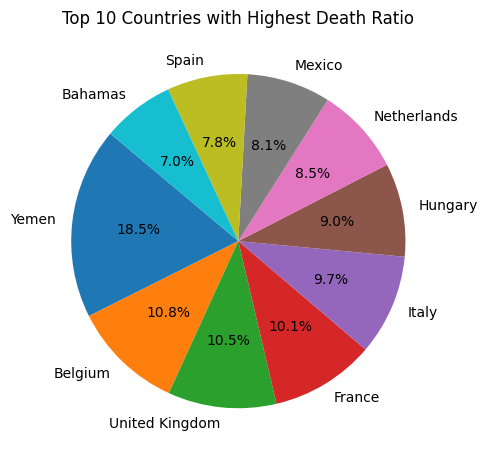

In [79]:
# Pie chart for Death Ratio of the top 10 countries
plt.figure(figsize=(5, 5))

# Create the pie chart
plt.pie(top_10_death_ratio['Deaths_Ratio'], labels=top_10_death_ratio['Country/Region'],
        autopct='%1.1f%%', startangle=140, colors=plt.cm.get_cmap('tab10', 10).colors)

# Add title
plt.title('Top 10 Countries with Highest Death Ratio')

# Display the pie chart
plt.tight_layout()

2 - A specific country's province with respect to death and recovery (you can pick any country)

                 Province/State  Confirmed  Deaths  Recovered  Active
0  Australian Capital Territory      13174     339      11264    1571
1               New South Wales     384636    5055     269428  110153
2            Northern Territory       3537       0       2794     743
3                    Queensland     129172     694     106911   21567
4               South Australia      54273     440      45793    8040
5                      Tasmania      25262    1328      19980    3954
6                      Victoria     279524    2526     195925   81073
7             Western Australia      70669    1005      59833    9831


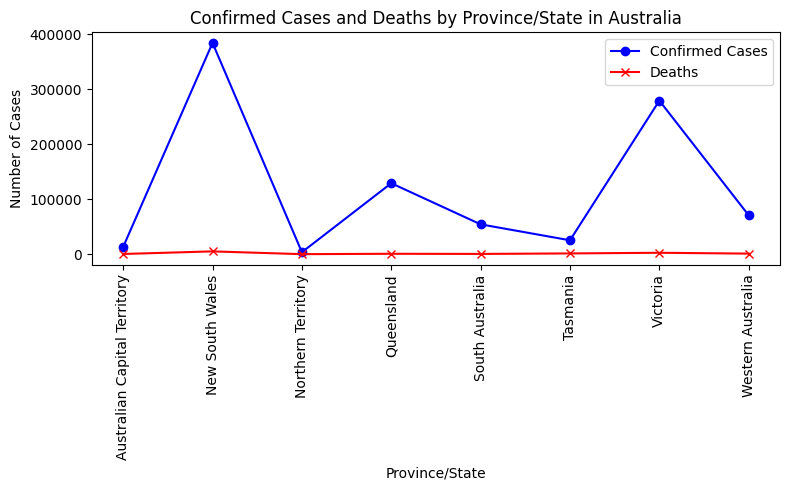

In [59]:
# Preprocessing: Convert 'Date' column to datetime
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Filter the data for Australia
australia_data = covid_data[covid_data['Country/Region'] == 'Australia']

# Aggregate data by Province/State (for Australia only)
aggregated_aus_data = australia_data.groupby('Province/State')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# Display the first few rows of the aggregated dataset for Australia
print(aggregated_aus_data.head(10))

# Plotting the line chart for Confirmed Cases and Deaths in Australia
plt.figure(figsize=(8, 5))

# Plot Confirmed Cases vs Province/State
plt.plot(aggregated_aus_data['Province/State'], aggregated_aus_data['Confirmed'], label='Confirmed Cases', color='blue', marker='o')

# Plot Deaths vs Province/State
plt.plot(aggregated_aus_data['Province/State'], aggregated_aus_data['Deaths'], label='Deaths', color='red', marker='x')

# Adding labels and title
plt.xlabel('Province/State')
plt.ylabel('Number of Cases')
plt.title('Confirmed Cases and Deaths by Province/State in Australia')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

3 - Check the trend between confirmed cases with deaths(Country base and province based)

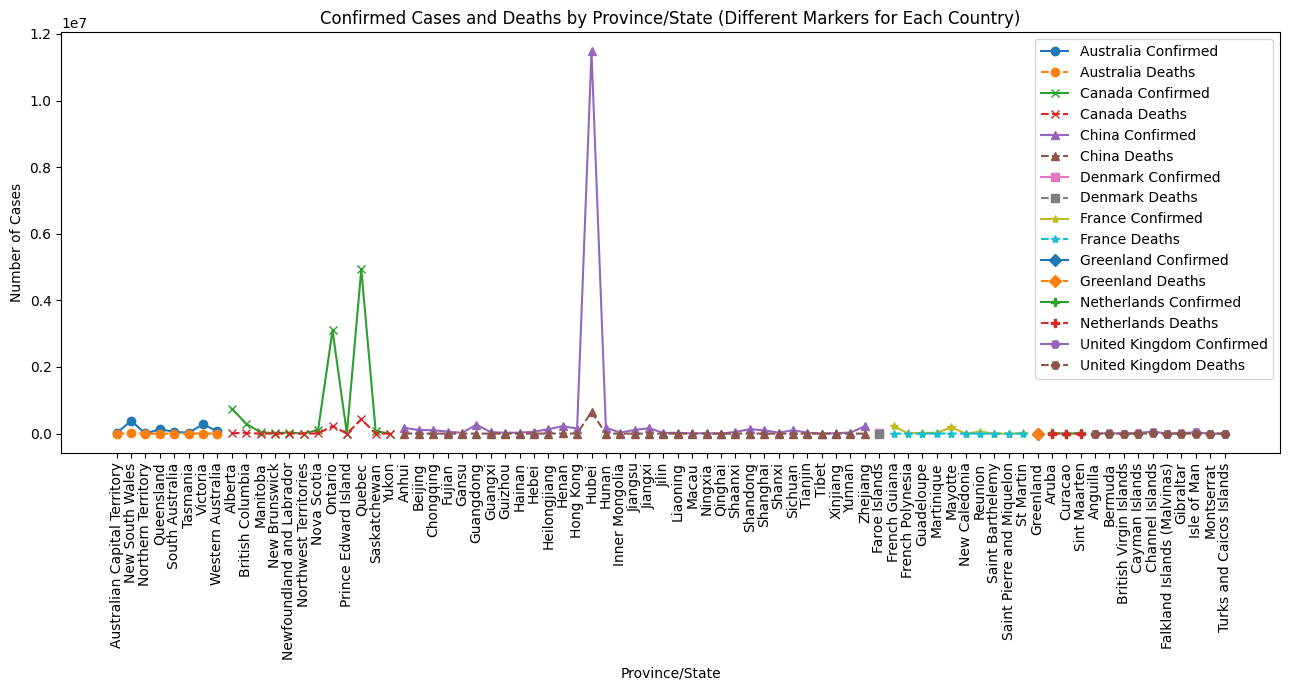

In [86]:
# Assuming covid_data is already loaded and preprocessed

# Aggregate data by Country/Region and Province/State
aggregated2_data = covid_data.groupby(['Country/Region', 'Province/State'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# Set up the plot
plt.figure(figsize=(13, 7))

# Get unique countries
countries = aggregated2_data['Country/Region'].unique()

# Define markers for each country
markers = ['o', 'x', '^', 's', '*', 'D', 'P', 'H', 'v', '+']

# Plot data for each country with different markers
for i, country in enumerate(countries):
    country_data = aggregated2_data[aggregated2_data['Country/Region'] == country]
    
    # Plot Confirmed Cases with a unique marker
    plt.plot(country_data['Province/State'], country_data['Confirmed'], label=f'{country} Confirmed', marker=markers[i % len(markers)], linestyle='-', markersize=6)
    
    # Plot Deaths with a unique marker
    plt.plot(country_data['Province/State'], country_data['Deaths'], label=f'{country} Deaths', marker=markers[i % len(markers)], linestyle='--', markersize=6)

# Adding labels and title
plt.xlabel('Province/State')
plt.ylabel('Number of Cases')
plt.title('Confirmed Cases and Deaths by Province/State (Different Markers for Each Country)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(loc = 'upper right')

# Display the plot
plt.tight_layout()
plt.show()


4 - Check the trend between time and confirmed cases recoveries and deaths (Country Based)


                     Province/State Country/Region      Lat      Long  \
8      Australian Capital Territory      Australia -35.4735  149.0124   
9                   New South Wales      Australia -33.8688  151.2093   
10               Northern Territory      Australia -12.4634  130.8456   
11                       Queensland      Australia -27.4698  153.0251   
12                  South Australia      Australia -34.9285  138.6007   
...                             ...            ...      ...       ...   
48818                    Queensland      Australia -27.4698  153.0251   
48819               South Australia      Australia -34.9285  138.6007   
48820                      Tasmania      Australia -42.8821  147.3272   
48821                      Victoria      Australia -37.8136  144.9631   
48822             Western Australia      Australia -31.9505  115.8605   

            Date  Confirmed  Deaths  Recovered  Active       WHO Region  
8     2020-01-22          0       0          0   

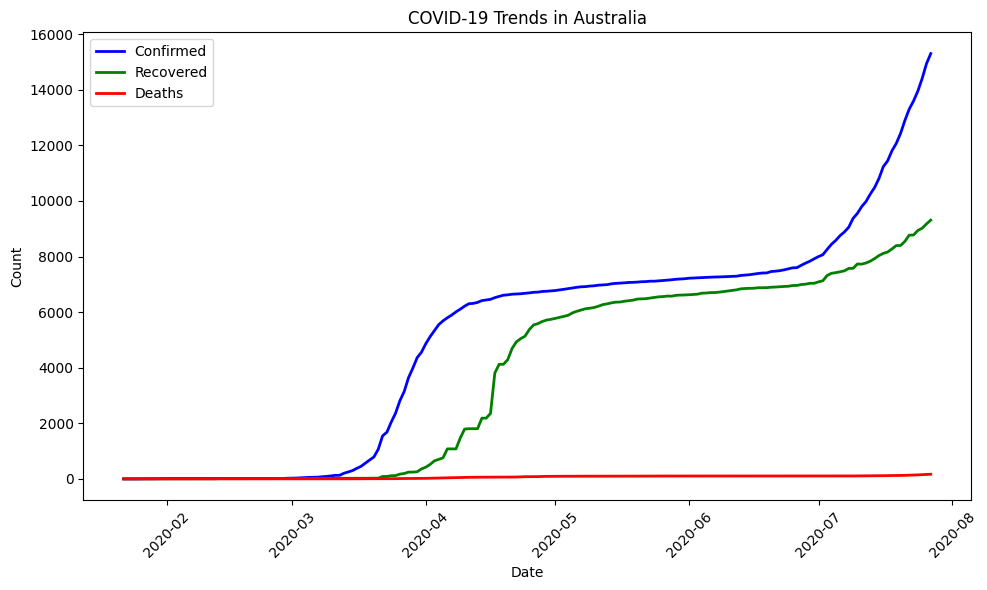

In [ ]:
# Choose a country to analyze, e.g., Australia
country = 'Australia'

# Filter the data for the specific country
country_data = covid_data[covid_data['Country/Region'] == country]

# Aggregate data by Date and Country/Region
country_trends = country_data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Plotting the trends

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plot Confirmed Cases, Recovered, and Deaths
plt.plot(country_trends['Date'], country_trends['Confirmed'], label='Confirmed', color='blue', linewidth=2)
plt.plot(country_trends['Date'], country_trends['Recovered'], label='Recovered', color='green', linewidth=2)
plt.plot(country_trends['Date'], country_trends['Deaths'], label='Deaths', color='red', linewidth=2)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title(f'COVID-19 Trends in {country}')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


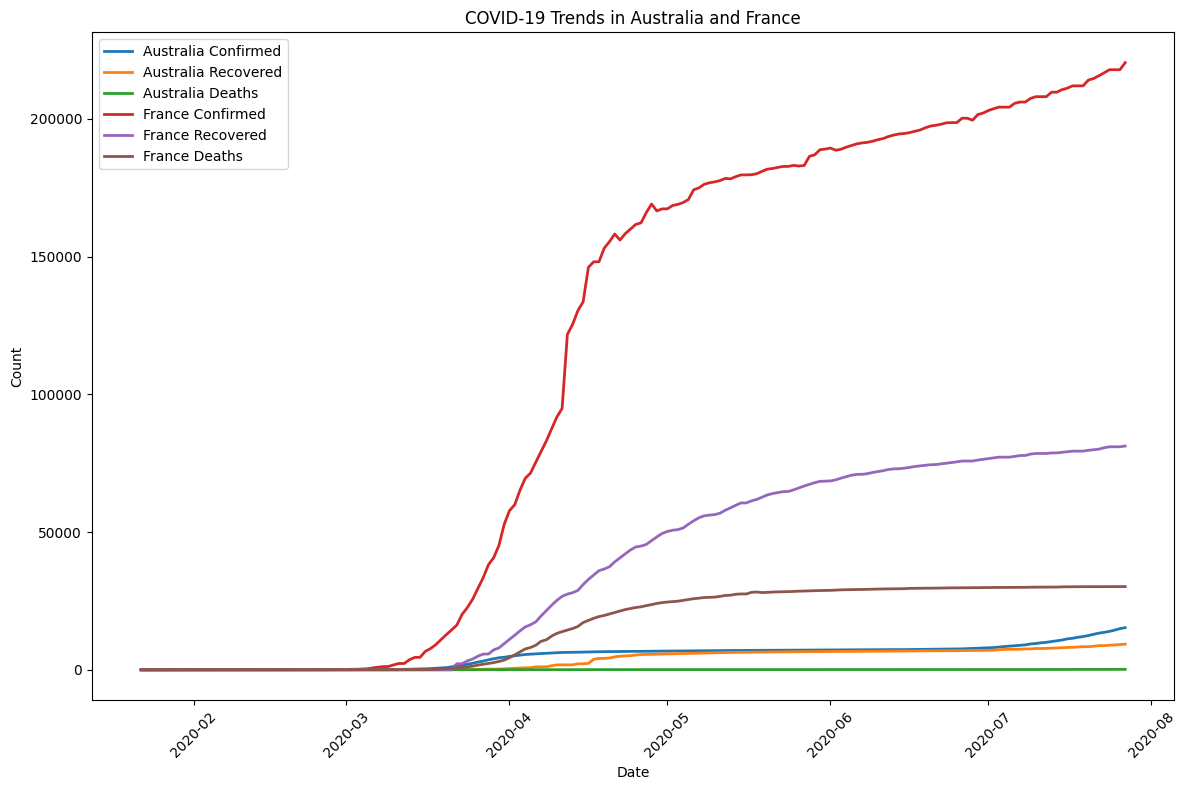

In [63]:
# Choose the countries to analyze: Australia and France
countries = ['Australia', 'France']

# Filter the data for the selected countries
countries_data = covid_data[covid_data['Country/Region'].isin(countries)]

# Aggregate data by Date and Country/Region
country_trends = countries_data.groupby(['Date', 'Country/Region'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Plotting the trends

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Plot Confirmed Cases, Recovered, and Deaths for both countries
for country in countries:
    country_data = country_trends[country_trends['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=f'{country} Confirmed', linewidth=2)
    plt.plot(country_data['Date'], country_data['Recovered'], label=f'{country} Recovered', linewidth=2)
    plt.plot(country_data['Date'], country_data['Deaths'], label=f'{country} Deaths', linewidth=2)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Trends in Australia and France')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()
